# King-County Housing Data Cleaning

## Objective
In this Jupyter Notebook we will be working with the **'kc_house_data.csv'** provided for this project. 

### Main Focus:
- Obtain data
- Handle missing values
- Deal with outliers
- Transform Datatypes if necessary 

## Step 1: Import necessay libraries and obtain data

In [1]:
# Import necessary libraries
# For importing and manipulating data
import pandas as pd  
# For data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load in dataset with Pandas. The dataset can be found in the 'Data' folder
kc_data = pd.read_csv('Data/kc_house_data.csv')
# View the first 5 rows of the dataset to ensure it loaded in properly
kc_data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


## Step 2: Review data

In [4]:
# Start by taking a look at the shape of the data.
kc_data.shape  # This shows how many rows and columns are in the dataset

(21597, 21)

In [5]:
# Confirm number of columns in dataset
print(f'There are {len(kc_data.columns)} columns in this dataset.')

There are 21 columns in this dataset.


As you can see this dataset has 21 columns. Included in this repo is a **'column_names.md'** file that explains what each column consists of. I'll be including them in this notebook for reference:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Now that we know how many columns are in the dataset and what each columns represents, we can take a closer look at the rows.
> By calling **kc_data.shape** we know that there are *21 Columns* and *21,597 Rows*. If this is accurate each column should have 21,597 entries. 

To check how many entries are in each column we can use **kc_data.info()**, which gives a concise summary the dataset. This includes the columns dtypes and non-null values.

In [6]:
# Use .info() to get row information 
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Just from looking at this summary, there are a couple of things that already stand out:
- 'date' is stored as an 'object' dtype. Converting the 'date' column to a 'datetime' dtype would be more beneficial to us.
- 'sqft_basement' is also an 'object' dtype, we can convert this to a 'float64' dtype.
- Like we said earlier all columns should have *21,597* entries each but as we can see: 'waterfront', 'view', and 'yr_renovated' all have missing data.

## Step 3: Check data for duplicates
Reviewing the data gave us a starting point for getting this dataset cleaned up, however, there is one more important course of action we have to take before moving forward. We know that this dataset contains 21,597 rows, but how many of those rows are duplicated? Let's find out.

In [7]:
# We know that the 'id' column is a unique identifier.
# If there are no duplicates in this data we should have 21,597 unique ids 
print(f'''This dataset contains {kc_data['id'].nunique()} unique rows''')

This dataset contains 21420 unique rows


As suspected this dataset contains several duplicated rows. Duplicates can cause our findings to be inaccurate so we can go ahead and drop the duplicated rows from our dataset.

In [8]:
# View all duplicates. If our math is right we should have 177 duplicates in the dataset.
kc_data[kc_data.duplicated('id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,...,9,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,...,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [9]:
# We can now go ahead and drop all duplicates
kc_data.drop_duplicates(subset=['id'], inplace=True)

In [10]:
# Double check to make sure all duplicates have been dropped
kc_data[kc_data.duplicated('id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


> If we were truly successful in dropping all duplicates, our new dimensions for **kc_data.shape** should be **(21420, 21)**. Let's find out.

In [11]:
# Check the new dimensions for the dataset
kc_data.shape

(21420, 21)

## Step 4: Clean data
Awesome now we can work on getting the data cleaned up.

### Transform Dtypes
Now that we no longer have duplicates in the dataset we can move on to:
- Converting 'date' to a **'datetime' dtype**
- Converting 'sqft_basement' to a **'float' dtype**
- Bonus: Change 'yr_built' and 'yr_renovated' to **'int'** instead of **'float' dtype**

In [12]:
# Transform 'date' to 'datetime' dtype and preview first 5 rows
kc_data['date'] = pd.to_datetime(kc_data['date'])

# Verify change
print(f'''Date column dtype has been transformed to '{kc_data['date'].dtype}' ''')
kc_data.head()

Date column dtype has been transformed to 'datetime64[ns]' 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
kc_data['yr_built'] = kc_data['yr_built'].astype(int)

In [14]:
kc_data['sqft_basement'].astype('float')

ValueError: could not convert string to float: '?'

Trying to convert 'sqft_basement' to a float gave us the following error:
> ValueError: could not convert string to float: '?'

Based on our earlier review of the data we know 'waterfront', 'view', and 'yr_renovated' all have missing values, but as we can see 'sqft_basement' has a '?' placeholder for it's missing values. Just to be safe let's make sure we don't have any more missing values in the data.

In [15]:
# Print out the sum of Null values in each column with .isna().sum()
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
# .isna().sum() did not yield any new information. 
# We can go ahead and take a closer look at the 'sqft_basement' columns
kc_data['sqft_basement'].value_counts() # Get the count of all unique values in the column

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
2500.0        1
20.0          1
2850.0        1
283.0         1
516.0         1
Name: sqft_basement, Length: 304, dtype: int64

> There are 452 data points with '?' as placeholders. The next course of action would be to deal with these missing values.

In [17]:
# Replace all '?' with 'NaN' which means 'Not a Number'
kc_data.sqft_basement.replace({'?': 'NaN'}, inplace=True)

> Changing '?' to 'NaN' makes it possible to tranform 'sqft_basement' to a 'float' dtype. Further information is needed before deciding on how to deal with the missing values.

In [18]:
# Check .value_counts to make sure the placeholders have been changed
kc_data['sqft_basement'].value_counts()

0.0       12717
NaN         452
600.0       216
500.0       206
700.0       205
          ...  
2850.0        1
283.0         1
1930.0        1
3480.0        1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [19]:
# Now we can go ahead and convert the column to a 'float' dtype
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype('float')

In [20]:
# Check .info() to make sure all columns have their respective dtypes
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    20968 non-null float64
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

### Deal with missing values

In [21]:
# Looking good so far, now we can focus on dealing with the null values
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In total we have **4 columns** with missing values. There are multiple ways of dealing with missing values:
- We can drop the column(s) with the missing values.
- We can drop only the row(s) with missing values.
- Or we can choose to fill in the missing values with either the 'Mean', 'Median', or 'Mode' of the column(s).

All these options come with *advantages and disadvantages* but ultimately it's up to us to decided what works best based on the data.

In [22]:
# Percentage of missing data in each column
for column in kc_data:
    col = kc_data[column]
    if col.isna().sum():
        print(f'{column}:{round((col.isna().sum() / len(kc_data) * 100), 1)}%')

waterfront:11.0%
view:0.3%
sqft_basement:2.1%
yr_renovated:17.8%


>Each column has less that 20% of their values missing so dropping columns would be redundant.

In [23]:
# Check percentage of missing data
miss_per = len(kc_data.loc[(kc_data['yr_renovated'].isna()) | (kc_data['waterfront'].isna()) | 
                           (kc_data['view'].isna()) | (kc_data['sqft_basement'].isna())]) / len(kc_data)
print(f'{round((miss_per * 100),1)}% of the data is missing, '
      f'which is approximately {len(kc_data) * miss_per} rows with missing values')

28.5% of the data is missing, which is approximately 6108.0 rows with missing values


Overall we have about 6,108 rows with at least 1 missing missing entry. This is slightly over a quarter of our data, dropping all this rows would be inefficient.  
> We can't drop all 6,108 rows but we can narrow that number down. 

In [24]:
# Check values with 2 or more missing data points
missing_2 = kc_data[kc_data.isna().sum(axis=1) >= 2] 
missing_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,2014-07-15,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
105,1328310370,2015-04-02,375000.0,3,2.50,2340,10005,1.0,NaN,0.0,...,8,1460,880.0,1978,NaN,98058,47.4431,-122.133,2250,8162
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,NaN,1900,NaN,98117,47.6981,-122.368,1830,6350
182,3127200041,2014-06-13,589000.0,4,3.00,2440,9600,2.0,NaN,0.0,...,7,2440,0.0,1961,NaN,98034,47.7044,-122.200,2290,9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,6021503707,2015-01-20,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,NaN,2008,0.0,98117,47.6844,-122.387,980,1023
21483,6891100090,2014-10-14,850000.0,5,3.50,4200,5400,2.0,NaN,0.0,...,9,3140,1060.0,2012,NaN,98052,47.7077,-122.120,3300,5564
21485,4233600150,2015-02-03,1150000.0,5,4.25,4010,8252,2.0,NaN,0.0,...,10,4010,0.0,2015,NaN,98075,47.5974,-122.013,3370,8252
21502,9521100867,2014-07-11,475000.0,3,3.25,1380,1121,3.0,NaN,0.0,...,8,1380,0.0,2008,NaN,98103,47.6617,-122.349,1310,1405


In [25]:
round(((len(missing_2) / len(kc_data)) * 100), 2)

2.6

Less than 3% of the entire dataset has 2 or more missing data points. **556 rows** is still a lot of data but it's a lot less than 6,108 

In [26]:
# Drop all 556 rows from original dataset
kc_data.drop(missing_2.index, axis=0,inplace=True)

In [27]:
# Confirm rows have been dropped form original dataframe
kc_data.shape

(20864, 21)

In [28]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1890
view               45
condition           0
grade               0
sqft_above          0
sqft_basement     332
yr_built            0
yr_renovated     3285
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now that we've gotten rid of as much data as we can spare it's time to look into other solutions for dealing with missing values.
> The options we have left is to fill the missing values with the 'Mean', 'Median', or 'Mode' of the column. We need more information to decide which is a better fit.

In [29]:
# Inspect missing columns statistical data with .describe()
for column in kc_data:
    col = kc_data[column]
    if col.isna().sum():
        print(f'{column.upper()}:\nmode       {col.mode()}\n{col.describe()}\n')

WATERFRONT:
mode       0    0.0
dtype: float64
count    18974.000000
mean         0.007695
std          0.087384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

VIEW:
mode       0    0.0
dtype: float64
count    20819.000000
mean         0.234017
std          0.765146
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

SQFT_BASEMENT:
mode       0    0.0
dtype: float64
count    20532.000000
mean       291.838106
std        442.920177
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

YR_RENOVATED:
mode       0    0.0
dtype: float64
count    17579.000000
mean        83.797486
std        400.325094
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_r

In [30]:
# Fill all null values with the mode of each column
kc_data['waterfront'].fillna(kc_data['waterfront'].mode()[0], inplace = True)
kc_data['yr_renovated'].fillna(kc_data['yr_renovated'].mode()[0], inplace = True)
kc_data['view'].fillna(kc_data['view'].mode()[0], inplace = True)
kc_data['sqft_basement'].fillna(kc_data['sqft_basement'].mode()[0], inplace = True)

In [31]:
# Make sure there are no more null values in the dataframe
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
# Now that all the null values in 'yr_renovated' column have been taken care off we can change the dtype to an 'int'
kc_data['yr_renovated'] = kc_data['yr_renovated'].astype(int)

In [33]:
# Let's take a look at .describe() and see if we can find any interesting issues to address
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.086400e+04,2.086400e+04,20864.000000,20864.000000,20864.000000,2.086400e+04,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000,20864.000000
mean,4.587089e+09,5.414005e+05,3.374856,2.119692,2084.816910,1.513908e+04,1.497532,0.006998,0.233512,3.410468,7.664302,1793.021472,287.194210,1971.154237,70.603719,98077.783263,47.560284,-122.213598,1989.147862,12811.254889
std,2.877647e+09,3.693081e+05,0.925941,0.769034,921.263887,4.133605e+04,0.539821,0.083361,0.764398,0.650447,1.173179,831.149970,440.897036,29.386086,368.724643,53.462303,0.138582,0.141002,685.593880,27506.208152
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.230000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471600,-122.328000,1490.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572300,-122.229000,1840.000000,7620.000000
75%,7.326200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10089.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> If you take a closer look at the bedrooms column in .describe(), you'll notice that the 'max' or 'Maximum' value in that column is 33.0. With the knowledge we have about our dataset and houses in general, it safe to say its very unlikely that a house has 33 bedrooms as we are only dealing with average houses and not mansions.

In [34]:
# Take a look at the 'bedrooms' column unique values
kc_data['bedrooms'].value_counts()

3     9481
4     6674
2     2655
5     1548
6      259
1      187
7       37
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

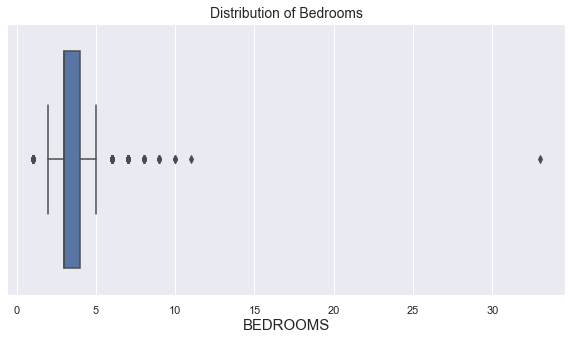

In [35]:
## Use a boxplot to visualize data
sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', data=kc_data)
plt.xlabel('BEDROOMS', fontsize=15)
plt.title('Distribution of Bedrooms',fontsize=14)
plt.show()

> As we can see 33 is way off to the very right(extreme outlier). There are 2 ways of fixing this, one by dropping the row from the dataset, and two by replacing it with whatever value we deem fit. But first we have to take a closer look at a couple of things, mainly why 33 was inputted to begin with. This could be for 1 of 2 reasons.
    * One, this is the correct specs for an actual house in the dataset
    * Or, two this was an input error and the value should actually be a 3.
Personally I think the second options is more probable but we're gonna need more than that to prove this point.

In [36]:
# Print row where 'bedrooms' = 33
kc_data[kc_data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0,98103,47.6878,-122.331,1330,4700


In [37]:
# Print first and last 5 rows where 'bedrooms' = 3
kc_data[kc_data['bedrooms'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0.0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,0.0,0.0,...,8,2270,0.0,2003,0,98065,47.5389,-121.881,2270,5731
21588,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0.0,0.0,...,8,1490,0.0,2014,0,98144,47.5699,-122.288,1400,1230
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0,98116,47.5773,-122.409,1330,1265
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509


In [38]:
# Look at the mean of all the columns grouped by number of 'bedrooms'
kc_data.drop(columns='id').groupby(['bedrooms']).mean()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,
1,3.178504e+05,1.080214,890.363636,16542.593583,1.157754,0.021390,0.262032,3.278075,6.112299,825.711230,64.117647,1942.925134,127.534759,98104.144385,47.569301,-122.260754,1449.486631,14412.016043
2,4.017840e+05,1.403107,1239.694162,12120.175895,1.309793,0.010546,0.180414,3.382674,6.873070,1107.444444,129.134840,1955.478343,73.381921,98105.823352,47.590207,-122.278077,1504.556685,9765.417702
3,4.664498e+05,1.970335,1806.599831,14424.540871,1.452853,0.005696,0.187955,3.416939,7.476216,1585.301550,218.298597,1971.964455,62.966670,98076.336990,47.551657,-122.213114,1836.606793,12808.931125
4,6.359357e+05,2.440291,2558.863500,16725.219658,1.617845,0.005544,0.263560,3.403956,8.121516,2202.729547,351.060533,1976.715912,70.670962,98069.673060,47.555845,-122.189008,2292.560833,13807.866197
5,7.926562e+05,2.784561,3062.043282,17006.839793,1.586240,0.012274,0.410207,3.448966,8.288760,2424.238372,626.021964,1974.361111,86.471576,98069.856589,47.574165,-122.200424,2448.406331,13226.050388
6,8.392363e+05,3.084942,3320.552124,18968.714286,1.608108,0.015444,0.555985,3.482625,8.127413,2514.266409,783.853282,1963.150579,153.980695,98079.108108,47.581368,-122.239494,2302.501931,14894.061776
7,9.609734e+05,3.682432,4011.891892,21248.405405,1.743243,0.000000,0.513514,3.432432,8.486486,3194.864865,782.432432,1964.513514,216.351351,98084.837838,47.609200,-122.239270,2336.756757,16083.216216
8,1.168833e+06,3.625000,3884.166667,9161.333333,1.750000,0.000000,0.250000,3.583333,8.166667,2760.000000,1124.166667,1954.583333,0.000000,98077.583333,47.619467,-122.263583,2307.500000,7333.583333
9,8.939998e+05,4.416667,3775.000000,5480.000000,2.166667,0.000000,0.000000,3.000000,7.833333,2935.000000,840.000000,1931.666667,335.000000,98110.666667,47.652767,-122.311333,2091.333333,4387.833333


> Upon closer look at the average of each column based on the number of 'bedrooms' you'll notice that it is very likely that '33' was an input error. Regardless of if we choose to replace this value with the mean, median, or mode the replacement value would still be 3.

In [39]:
# Replace value with the 'mode' which is 3
kc_data.bedrooms.replace({33 : kc_data['bedrooms'].mode()[0]}, inplace=True)

In [40]:
# Confirm value has been changed
kc_data['bedrooms'].value_counts()

3     9482
4     6674
2     2655
5     1548
6      259
1      187
7       37
8       12
9        6
10       3
11       1
Name: bedrooms, dtype: int64

One last thing before we move to EDA. The 'id' column is a unique identifier for each house, it was useful in helping us detect duplicates in the dataset but it is of no further use to us so we can go ahead and drop this column.

In [41]:
# drop 'id' column
kc_data.drop(['id'], axis=1, inplace=True)

In [42]:
# Check column names to verify
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20864 entries, 0 to 21596
Data columns (total 20 columns):
date             20864 non-null datetime64[ns]
price            20864 non-null float64
bedrooms         20864 non-null int64
bathrooms        20864 non-null float64
sqft_living      20864 non-null int64
sqft_lot         20864 non-null int64
floors           20864 non-null float64
waterfront       20864 non-null float64
view             20864 non-null float64
condition        20864 non-null int64
grade            20864 non-null int64
sqft_above       20864 non-null int64
sqft_basement    20864 non-null float64
yr_built         20864 non-null int64
yr_renovated     20864 non-null int64
zipcode          20864 non-null int64
lat              20864 non-null float64
long             20864 non-null float64
sqft_living15    20864 non-null int64
sqft_lot15       20864 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


Awesome! Now that the data is all cleaned up we can save the new dataframe as a CSV to load into our EDA notebook.


In [43]:
# The new dataset should also be saved into the 'Data' folder
kc_data.to_csv('Data/kc_cleaned.csv')